# Intro to Regression

In [1]:
# import some of the libraries essential for numeric calculations, data manipulation, and graphs
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

First, we need some data with which we can practice Linear Regression. We will generate a data that would be useful for this without needing to worry too much about multiple `features`. We will start with a simple linear regression.

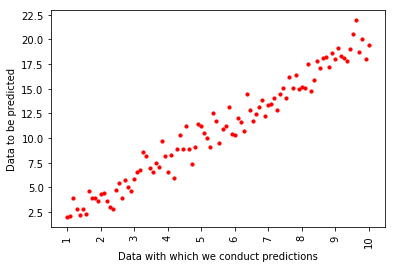

In [3]:
# Generating the data
X = np.linspace(1,10,100)
weight = 2 # this is what we try to determine when we run a Machine Learning Algorithm.
y = X*weight + np.random.randn(100) 

#labelling the axes. Labels are what are written along the axis spines.
plt.ylabel('Data to be predicted')
plt.xlabel('Data with which we conduct predictions')
plt.xticks(np.arange(1,11),rotation=90)
# plotting the graph
plt.scatter(X,y,color='r',s=10)

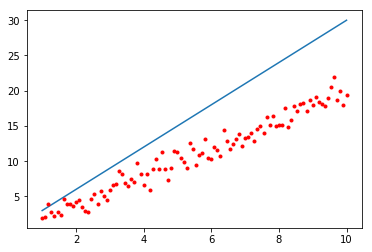

In [4]:
plt.plot(X,3*X,X,y,'r.')

We see that the data follows a somewhat linear path. But with this sort of data, we can conduct linear regression to predict what the `Y-value` will be when the `X-value` is present. First, we take note of the errors in our data.

In [5]:
# The amount by which our present data may lie off from our fitted line
errors = y - X*2 

Then we plot the errors to better visualize what our data looks like

<BarContainer object of 100 artists>

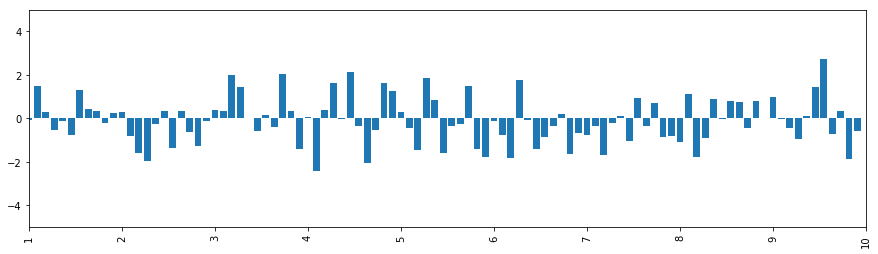

In [6]:
# A simple representation of the errors that we know exist.
plt.figure(figsize=(15,4))
plt.axis([1,100,-5,5])
plt.xticks(np.linspace(1,100,10),np.arange(1,11),rotation=90)
plt.bar(range(100),height = errors)

In [7]:
import sklearn.linear_model as LinMod

In [8]:
regressor = LinMod.LinearRegression()

First, we split the data into our training set and out test set. We need to do this to check the accuracy of our predictive power.

In [10]:
# this is what we train our model with
X_train = X[:70].reshape(-1,1) # with reshape, we convert our data from 1D to 2D as required by LinearRegression()
y_train = y[:70]
# this is what we predict. 
X_test = X[70:].reshape(-1,1)
y_test = y[70:]

In [11]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
y_pred = regressor.predict(X_test)

We can conduct a simple calculation to see how well our model predicts the data. We know that the model can't be prefect but we can understand how accurately our model can predict the data. Here, we use a simple metric called mean of sum of squares ( $MSE$ ) to figure out the relative error of our model. <br>

We denote `y_pred` as $\hat Y$, `y_test` as $Y$, and number of elements as $n$.

$${\displaystyle \operatorname {MSE} ={\frac {1}{n}}\sum _{i=1}^{n}(Y_{i}-{\hat {Y_{i}}})^{2}.} $$

We implement this as follows

In [13]:
MSE = (sum((y_pred - y_test)**2))/len(y_test)
print("Mean Sum of Squares:",MSE)

Mean Sum of Squares: 1.3668701963469014


Now, we use some actual, real-world data to understand how regression works.
We will use the Boston Housing Data set. This data set uses several features of a house and the area to predict the price of a house in Boston. This data set is included in the `scikit-learn` module

# The Boston Housing Data set
The data set we built previously only contains one feature. This housing dataset contains multiple features. This means that the model should work with multiple regression coefficients and also deal with multicollinearity.

In [14]:
# first, we import the module scikit-learn with the following command
import sklearn as sk

In [15]:
# Then, we import the boston housing dataset from sklearn.
from sklearn.datasets import load_boston

In [16]:
print(load_boston().DESCR) # to print the description of the data set that we can use

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [17]:
housing = pd.DataFrame(load_boston().data, columns=load_boston().feature_names)
targets = pd.Series(load_boston().target)
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [18]:
targets

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Length: 506, dtype: float64

We would learn a lot about the data once we visualize it. So, we follow the steps outlined in this guide for a proper start at analysis and visualization.

In [19]:
from sklearn.ensemble import RandomForestRegressor

```python
n_estimators=10, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False
```

In [20]:
housing_full = housing.copy()
housing_full['COST'] = targets
housing_full

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,COST
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [21]:
# The following code does what we manually did to split the data earlier
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(housing, targets, test_size = 0.3, random_state = 1)

In [279]:
# Then, we import the LinearRegression function from the sklearn module

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
regressor = LinearRegression(fit_intercept=True)

In [25]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
y_pred = regressor.predict(X_test)

In [27]:
# Then, we calculate the error in our prediction to test how well the model performs using the MSE or the mean_squared_error
from sklearn.metrics import mean_squared_error

In [28]:
print("Mean squared error with LinearRegressor(): \n",mean_squared_error(y_test, y_pred))

Mean squared error with LinearRegressor(): 
 19.831323672063235


Now, we can try out other Regression Methods from the sklearn library.
- Support Vector Regression
- Ridge Regression
- LASSO Regression
- ElasticNet

We could also look into other error metrics available

In [29]:
from sklearn.metrics import mean_absolute_error

In [30]:
#importing the required regression algorithm
from sklearn.svm import SVR

#learning
regressor = SVR()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

#understanding error
print("Mean squared error with SVR(): \n",mean_squared_error(y_test, y_pred))
print("Mean absolute error with SVR(): \n",mean_absolute_error(y_test, y_pred))

Mean squared error with SVR(): 
 93.66556055890354
Mean absolute error with SVR(): 
 6.727404940233814


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [31]:
from sklearn.linear_model import ElasticNet

regressor = ElasticNet()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

print("Mean squared error with ElasticNet(): \n",mean_squared_error(y_test, y_pred))
print("Mean absolute error with ElasticNet(): \n",mean_absolute_error(y_test, y_pred))

Mean squared error with ElasticNet(): 
 27.513171154748665
Mean absolute error with ElasticNet(): 
 3.7330754019537147


In [32]:
from sklearn.linear_model import Ridge

regressor = Ridge()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

print("Mean squared error with Ridge(): \n",mean_squared_error(y_test, y_pred))
print("Mean absolute error with Ridge(): \n",mean_absolute_error(y_test, y_pred))

Mean squared error with Ridge(): 
 19.334416287843634
Mean absolute error with Ridge(): 
 3.289041895915759


In [33]:
from sklearn.linear_model import Lars

regressor = Lars()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

print("Mean squared error with Lars(): \n",mean_squared_error(y_test, y_pred))
print("Mean absolute error with Lars(): \n",mean_absolute_error(y_test, y_pred))

Mean squared error with Lars(): 
 19.831323672063107
Mean absolute error with Lars(): 
 3.344665503598743


In [34]:
from sklearn.linear_model import LassoLars

regressor = LassoLars()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

print("Mean squared error with LassoLars(): \n",mean_squared_error(y_test, y_pred))
print("Mean absolute error with LassoLars(): \n",mean_absolute_error(y_test, y_pred))

Mean squared error with LassoLars(): 
 92.06717299928938
Mean absolute error with LassoLars(): 
 6.7759143621766285


In [35]:
from sklearn.linear_model import Lasso

regressor = Lasso()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

print("Mean squared error with Lasso(): \n",mean_squared_error(y_test, y_pred))
print("Mean absolute error with Lasso(): \n",mean_absolute_error(y_test, y_pred))

Mean squared error with Lasso(): 
 30.29379822196717
Mean absolute error with Lasso(): 
 3.899298556575456
